# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
# SalvƒÉm dataset-ul √Æntr-un fi»ôier CSV
data.to_csv("census_data.csv", index=False)

print("‚úÖ Fi»ôierul 'census_data.csv' a fost salvat cu succes!")


‚úÖ Fi»ôierul 'census_data.csv' a fost salvat cu succes!


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1Ô∏è‚É£ Citim fi»ôierul CSV
file_path = "census_data.csv"  # AsigurƒÉ-te cƒÉ este √Æn folderul corect
df = pd.read_csv(file_path)

# 2Ô∏è‚É£ CreƒÉm un Label Encoder
label_encoder = LabelEncoder()

# 3Ô∏è‚É£ EncodƒÉm variabila `sex`
df["sex"] = label_encoder.fit_transform(df["sex"])  # Male=1, Female=0

# 4Ô∏è‚É£ EncodƒÉm variabila `income`
df["income"] = label_encoder.fit_transform(df["income"])  # <=50K=0, >50K=1

# 5Ô∏è‚É£ VerificƒÉm primele r√¢nduri
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex  \
0       Never-married       Adm-clerical  Not-in-family  White    1   
1  Married-civ-spouse    Exec-managerial        Husband  White    1   
2            Divorced  Handlers-cleaners  Not-in-family  White    1   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    1   
4  Married-civ-spouse     Prof-specialty           Wife  Black    0   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-Stat

In [6]:
# Definim ordinea educa»õiei √Æn mod corespunzƒÉtor (1-16)
education_order = {
    "Preschool": 1, "1st-4th": 2, "5th-6th": 3, "7th-8th": 4, "9th": 5,
    "10th": 6, "11th": 7, "12th": 8, "HS-grad": 9, "Some-college": 10,
    "Assoc-voc": 11, "Assoc-acdm": 12, "Bachelors": 13, "Prof-school": 14,
    "Masters": 15, "Doctorate": 16
}

# AplicƒÉm encoding-ul manual pentru a evita pierderi de date
df["education"] = df["education"].map(education_order)

# VerificƒÉm dacƒÉ encoding-ul s-a aplicat corect
print(df["education"].unique())


[13  9  7 15  5 10 12 11  4 16 14  3  6  2  1  8]


In [7]:
# AplicƒÉm One-Hot Encoding pe variabilele categorice
df = pd.get_dummies(df, columns=["workclass", "marital-status", "occupation",
                                 "relationship", "race", "native-country"],
                    drop_first=True)  # EliminƒÉm prima categorie pentru colinearitate

# VerificƒÉm rezultatul
print(df.head())


   age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0   39   77516         13             13    1          2174             0   
1   50   83311         13             13    1             0             0   
2   38  215646          9              9    1             0             0   
3   53  234721          7              7    1             0             0   
4   28  338409         13             13    0             0             0   

   hours-per-week  income  workclass_Federal-gov  ...  \
0              40       0                  False  ...   
1              13       0                  False  ...   
2              40       0                  False  ...   
3              40       0                  False  ...   
4              40       0                  False  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                    False                       False   
1                    False                       False   
2                   

In [8]:
df.head(40)

age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0    39   77516         13             13    1          2174             0   
1    50   83311         13             13    1             0             0   
2    38  215646          9              9    1             0             0   
3    53  234721          7              7    1             0             0   
4    28  338409         13             13    0             0             0   
5    37  284582         15             14    0             0             0   
6    49  160187          5              5    0             0             0   
7    52  209642          9              9    1             0             0   
8    31   45781         15             14    0         14084             0   
9    42  159449         13             13    1          5178             0   
10   37  280464         10             10    1             0             0   
11   30  141297         13             13    1             0             0   
12   23  122272         13             13    0             0             0   
13   32  205019         12             12    1             0             0   
14   40  121772         11             11    1             0             0   
15   34  245487          4              4    1             0             0   
16   25  176756          9              9    1             0             0   
17   32  186824          9              9    1             0             0   
18   38   28887          7              7    1             0             0   
19   43  292175         15             14    0             0             0   
20   40  193524         16             16    1             0             0   
21   54  302146          9              9    0             0             0   
22   35   76845          5              5    1             0             0   
23   43  117037          7              7    1             0          2042   
24   59  109015          9              9    0             0             0   
25   56  216851         13             13    1             0             0   
26   19  168294          9              9    1             0             0   
27   54  180211         10             10    1             0             0   
28   39  367260          9              9    1             0             0   
29   49  193366          9              9    1             0             0   
30   23  190709         12             12    1             0             0   
31   20  266015         10             10    1             0             0   
32   45  386940         13             13    1             0          1408   
33   30   59951         10             10    1             0             0   
34   22  311512         10             10    1             0             0   
35   48  242406          7              7    1             0             0   
36   21  197200         10             10    1             0             0   
37   19  544091          9              9    0             0             0   
38   31   84154         10             10    1             0             0   
39   48  265477         12             12    1             0             0   

    hours-per-week  income  workclass_Federal-gov  ...  \
0               40       0                  False  ...   
1               13       0                  False  ...   
2               40       0                  False  ...   
3               40       0                  False  ...   
4               40       0                  False  ...   
5               40       0                  False  ...   
6               16       0                  False  ...   
7               45       1                  False  ...   
8               50       1                  False  ...   
9               40       1                  False  ...   
10              80       1                  False  ...   
11              40       1                  False  ...   
12              30       0                  False  

In [9]:
# Convertim toate coloanele bool √Æn int (0 »ôi 1)
df = df.astype(int)

# VerificƒÉm dacƒÉ s-a aplicat corect conversia
print(df.dtypes)
print(df.head())


age                               int64
fnlwgt                            int64
education                         int64
education-num                     int64
sex                               int64
                                  ...  
native-country_Thailand           int64
native-country_Trinadad&Tobago    int64
native-country_United-States      int64
native-country_Vietnam            int64
native-country_Yugoslavia         int64
Length: 87, dtype: object
   age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0   39   77516         13             13    1          2174             0   
1   50   83311         13             13    1             0             0   
2   38  215646          9              9    1             0             0   
3   53  234721          7              7    1             0             0   
4   28  338409         13             13    0             0             0   

   hours-per-week  income  workclass_Federal-gov  ...  \
0             

In [10]:
df.head(40)

age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0    39   77516         13             13    1          2174             0   
1    50   83311         13             13    1             0             0   
2    38  215646          9              9    1             0             0   
3    53  234721          7              7    1             0             0   
4    28  338409         13             13    0             0             0   
5    37  284582         15             14    0             0             0   
6    49  160187          5              5    0             0             0   
7    52  209642          9              9    1             0             0   
8    31   45781         15             14    0         14084             0   
9    42  159449         13             13    1          5178             0   
10   37  280464         10             10    1             0             0   
11   30  141297         13             13    1             0             0   
12   23  122272         13             13    0             0             0   
13   32  205019         12             12    1             0             0   
14   40  121772         11             11    1             0             0   
15   34  245487          4              4    1             0             0   
16   25  176756          9              9    1             0             0   
17   32  186824          9              9    1             0             0   
18   38   28887          7              7    1             0             0   
19   43  292175         15             14    0             0             0   
20   40  193524         16             16    1             0             0   
21   54  302146          9              9    0             0             0   
22   35   76845          5              5    1             0             0   
23   43  117037          7              7    1             0          2042   
24   59  109015          9              9    0             0             0   
25   56  216851         13             13    1             0             0   
26   19  168294          9              9    1             0             0   
27   54  180211         10             10    1             0             0   
28   39  367260          9              9    1             0             0   
29   49  193366          9              9    1             0             0   
30   23  190709         12             12    1             0             0   
31   20  266015         10             10    1             0             0   
32   45  386940         13             13    1             0          1408   
33   30   59951         10             10    1             0             0   
34   22  311512         10             10    1             0             0   
35   48  242406          7              7    1             0             0   
36   21  197200         10             10    1             0             0   
37   19  544091          9              9    0             0             0   
38   31   84154         10             10    1             0             0   
39   48  265477         12             12    1             0             0   

    hours-per-week  income  workclass_Federal-gov  ...  \
0               40       0                      0  ...   
1               13       0                      0  ...   
2               40       0                      0  ...   
3               40       0                      0  ...   
4               40       0                      0  ...   
5               40       0                      0  ...   
6               16       0                      0  ...   
7               45       1                      0  ...   
8               50       1                      0  ...   
9               40       1                      0  ...   
10              80       1                      0  ...   
11              40       1                      0  ...   
12              30       0                      0  

In [11]:
df.to_csv("census_data_preprocessed.csv", index=False)
print("‚úÖ Fi»ôierul 'census_data_preprocessed.csv' a fost salvat cu succes!")


‚úÖ Fi»ôierul 'census_data_preprocessed.csv' a fost salvat cu succes!


### Valori lipsa

In [12]:
# VerificƒÉm numƒÉrul de valori lipsƒÉ pe fiecare coloanƒÉ
missing_values = df.isnull().sum()

# Afi»ôƒÉm doar coloanele care au valori lipsƒÉ
print(missing_values[missing_values > 0])


Series([], dtype: int64)


### Verificarea duplicatelor

In [20]:
# VerificƒÉm numƒÉrul de r√¢nduri duplicate
duplicate_rows = df.duplicated().sum()
print(f"NumƒÉrul de duplicate gƒÉsite: {duplicate_rows}")

NumƒÉrul de duplicate gƒÉsite: 0


In [18]:
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicatele au fost eliminate!")

### Verificarea erorilor »ôi inconsecven»õelor

In [19]:
# Afi»ôƒÉm categoriile pentru fiecare coloanƒÉ categorialƒÉ
categorical_columns = ["workclass", "marital-status", "occupation", "relationship", "race", "native-country"]

for col in categorical_columns:
    if col in df.columns:
        print(f"Valori unice √Æn '{col}':\n", df[col].unique())


In [22]:
# CurƒÉ»õƒÉm spa»õiile goale »ôi transformƒÉm textul √Æn lowercase pentru uniformizare
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()


In [23]:
print(df.dtypes)


age                               int64
fnlwgt                            int64
education                         int64
education-num                     int64
sex                               int64
                                  ...  
native-country_Thailand           int64
native-country_Trinadad&Tobago    int64
native-country_United-States      int64
native-country_Vietnam            int64
native-country_Yugoslavia         int64
Length: 87, dtype: object


In [21]:
print(df.isnull().sum())


age                               0
fnlwgt                            0
education                         0
education-num                     0
sex                               0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 87, dtype: int64


In [25]:
print(data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [27]:
df.head(20)

age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0    39   77516         13             13    1          2174             0   
1    50   83311         13             13    1             0             0   
2    38  215646          9              9    1             0             0   
3    53  234721          7              7    1             0             0   
4    28  338409         13             13    0             0             0   
5    37  284582         15             14    0             0             0   
6    49  160187          5              5    0             0             0   
7    52  209642          9              9    1             0             0   
8    31   45781         15             14    0         14084             0   
9    42  159449         13             13    1          5178             0   
10   37  280464         10             10    1             0             0   
11   30  141297         13             13    1             0             0   
12   23  122272         13             13    0             0             0   
13   32  205019         12             12    1             0             0   
14   40  121772         11             11    1             0             0   
15   34  245487          4              4    1             0             0   
16   25  176756          9              9    1             0             0   
17   32  186824          9              9    1             0             0   
18   38   28887          7              7    1             0             0   
19   43  292175         15             14    0             0             0   

    hours-per-week  income  workclass_Federal-gov  ...  \
0               40       0                      0  ...   
1               13       0                      0  ...   
2               40       0                      0  ...   
3               40       0                      0  ...   
4               40       0                      0  ...   
5               40       0                      0  ...   
6               16       0                      0  ...   
7               45       1                      0  ...   
8               50       1                      0  ...   
9               40       1                      0  ...   
10              80       1                      0  ...   
11              40       1                      0  ...   
12              30       0                      0  ...   
13              50       0                      0  ...   
14              40       1                      0  ...   
15              45       0                      0  ...   
16              35       0                      0  ...   
17              40       0                      0  ...   
18              50       0                      0  ...   
19              45       1                      0  ...   

    native-country_Portugal  native-country_Puerto-Rico  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   
5                         0                           0   
6                         0                           0   
7                         0                           0   
8                         0                           0   
9                         0                           0   
10                        0                           0   
11                        0                           0   
12                        0                           0   
13                        0                           0   
14                        0                           0   
15                        0                           0   
16                        0                           0   
17                        0                           0   
18                       

In [28]:
print(df.dtypes)


age                               int64
fnlwgt                            int64
education                         int64
education-num                     int64
sex                               int64
                                  ...  
native-country_Thailand           int64
native-country_Trinadad&Tobago    int64
native-country_United-States      int64
native-country_Vietnam            int64
native-country_Yugoslavia         int64
Length: 87, dtype: object


In [29]:
print("income" in df.columns)


True


In [32]:
print(df.dtypes)


age                               int64
fnlwgt                            int64
education                         int64
education-num                     int64
sex                               int64
                                  ...  
native-country_Thailand           int64
native-country_Trinadad&Tobago    int64
native-country_United-States      int64
native-country_Vietnam            int64
native-country_Yugoslavia         int64
Length: 87, dtype: object


In [31]:
df["income"] = df["income"].astype(int)


In [33]:
print(df.head())


   age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0   39   77516         13             13    1          2174             0   
1   50   83311         13             13    1             0             0   
2   38  215646          9              9    1             0             0   
3   53  234721          7              7    1             0             0   
4   28  338409         13             13    0             0             0   

   hours-per-week  income  workclass_Federal-gov  ...  \
0              40       0                      0  ...   
1              13       0                      0  ...   
2              40       0                      0  ...   
3              40       0                      0  ...   
4              40       0                      0  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                   

In [34]:
print(df.describe(include='all'))


                age        fnlwgt     education  education-num           sex  \
count  32537.000000  3.253700e+04  32537.000000   32537.000000  32537.000000   
mean      38.585549  1.897808e+05     10.117036      10.081815      0.669238   
std       13.637984  1.055565e+05      2.631216       2.571633      0.470495   
min       17.000000  1.228500e+04      1.000000       1.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000       9.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      10.000000      1.000000   
75%       48.000000  2.369930e+05     12.000000      12.000000      1.000000   
max       90.000000  1.484705e+06     16.000000      16.000000      1.000000   

       capital-gain  capital-loss  hours-per-week        income  \
count  32537.000000  32537.000000    32537.000000  32537.000000   
mean    1078.443741     87.368227       40.440329      0.240926   
std     7387.957424    403.101833       12.346889      0.427652   
min        

### Verificarea »ôi corectarea outlierilor


#### Identificarea outlierilor folosind IQR (Interquartile Range)

In [35]:
import numpy as np

# SelectƒÉm doar coloanele numerice
numerical_columns = df.select_dtypes(include=[np.number]).columns

# CalculƒÉm Q1, Q3 »ôi IQR pentru fiecare coloanƒÉ numericƒÉ
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# IdentificƒÉm outlierii
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Afi»ôƒÉm c√¢te outlieri existƒÉ pentru fiecare coloanƒÉ
print("NumƒÉrul de outlieri per coloanƒÉ:\n", outliers.sum())


NumƒÉrul de outlieri per coloanƒÉ:
 age                                142
fnlwgt                             993
education                         1193
education-num                     1193
sex                                  0
                                  ... 
native-country_Thailand             18
native-country_Trinadad&Tobago      19
native-country_United-States      3384
native-country_Vietnam              67
native-country_Yugoslavia           16
Length: 87, dtype: int64


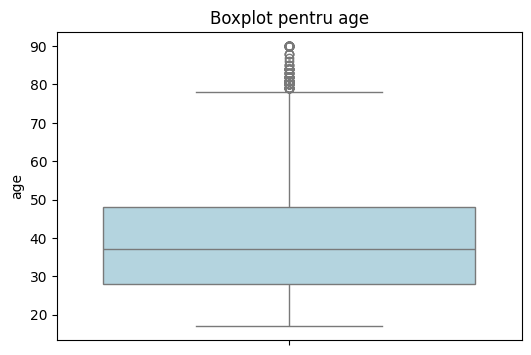

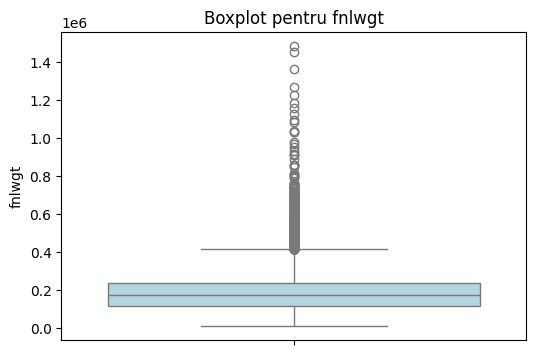

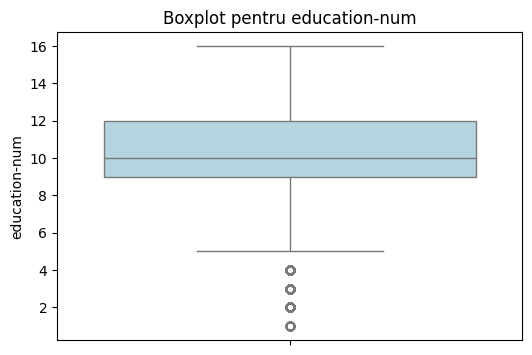

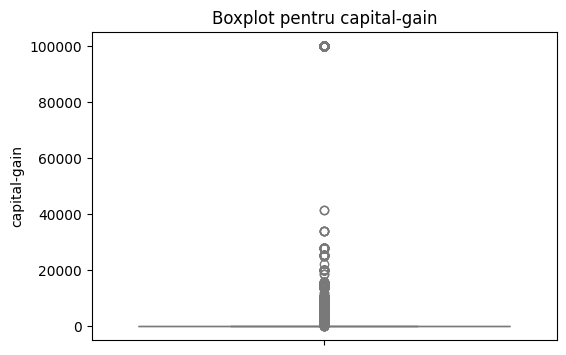

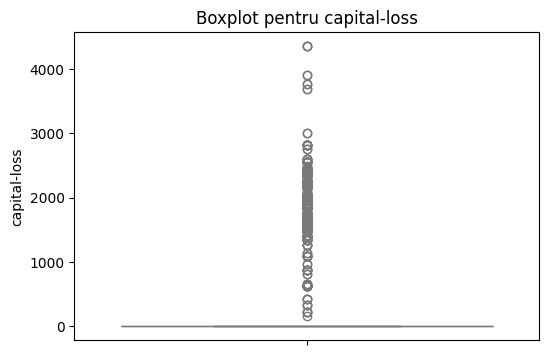

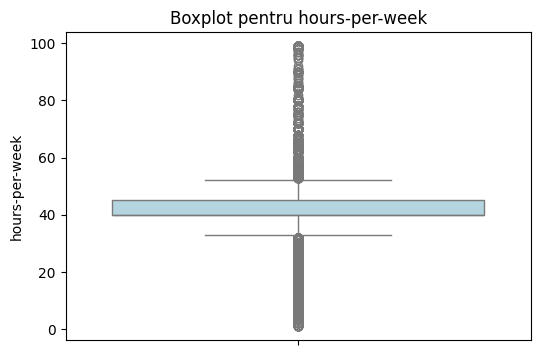

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# SelectƒÉm coloanele numerice
numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# CreƒÉm un boxplot pentru fiecare coloanƒÉ numericƒÉ
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot pentru {col}")
    plt.show()


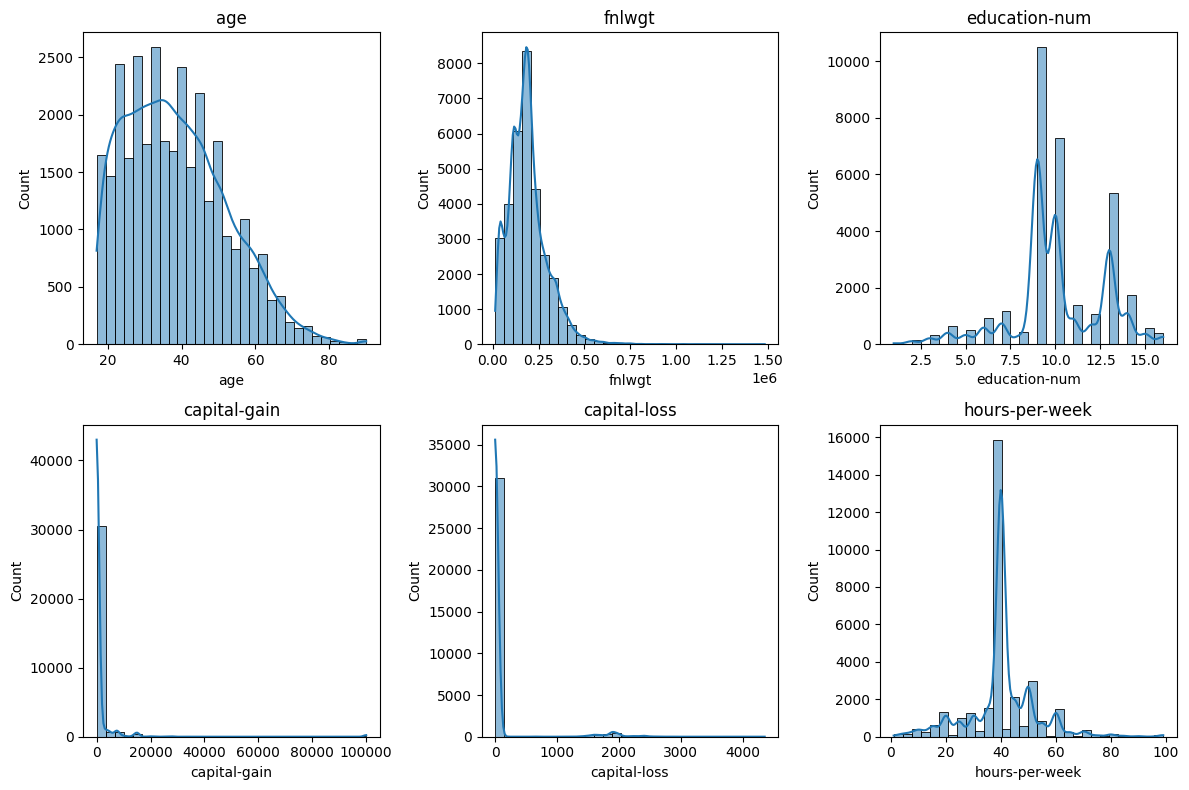

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# HistogramƒÉ pentru c√¢teva coloane relevante
cols_to_check = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


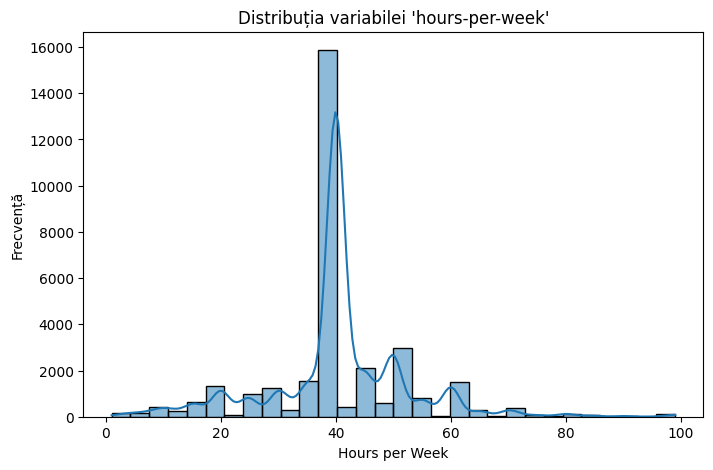

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# CreƒÉm histogramƒÉ pentru "hours-per-week"
plt.figure(figsize=(8, 5))
sns.histplot(df["hours-per-week"], bins=30, kde=True)

# AdƒÉugƒÉm titlu »ôi etichete
plt.title("Distribu»õia variabilei 'hours-per-week'")
plt.xlabel("Hours per Week")
plt.ylabel("Frecven»õƒÉ")

# Afi»ôƒÉm graficul
plt.show()


NumƒÉrul de outlieri pentru 'hours-per-week': 9002


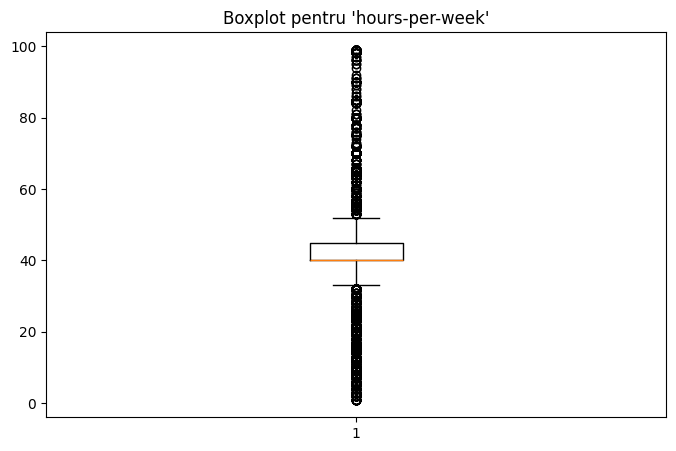

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definim limitele outlierilor folosind IQR (Interquartile Range)
Q1 = df["hours-per-week"].quantile(0.25)
Q3 = df["hours-per-week"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# NumƒÉrƒÉm outlierii
outliers = df[(df["hours-per-week"] < lower_bound) | (df["hours-per-week"] > upper_bound)]
print(f"NumƒÉrul de outlieri pentru 'hours-per-week': {outliers.shape[0]}")

# VizualizƒÉm distribu»õia
plt.figure(figsize=(8,5))
plt.boxplot(df["hours-per-week"])
plt.title("Boxplot pentru 'hours-per-week'")
plt.show()


 #### √énlocuim outlierii cu mediana

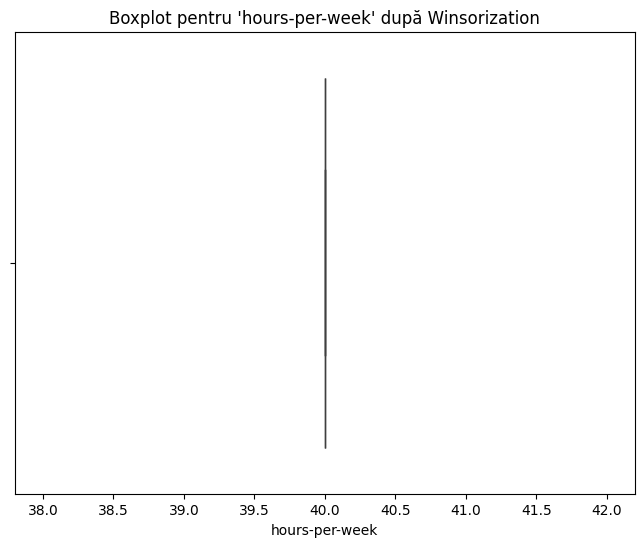

In [49]:
from scipy.stats.mstats import winsorize

# AplicƒÉm Winsorization: limitƒÉm outlierii la 5% din extreme
df["hours-per-week"] = winsorize(df["hours-per-week"], limits=[0.05, 0.05])

# VerificƒÉm distribu»õia dupƒÉ Winsorization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["hours-per-week"])
plt.title("Boxplot pentru 'hours-per-week' dupƒÉ Winsorization")
plt.show()



In [43]:
# RecalculƒÉm limitele IQR dupƒÉ √Ænlocuire
Q1 = df["hours-per-week"].quantile(0.25)
Q3 = df["hours-per-week"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# NumƒÉrƒÉm c√¢»õi outlieri mai sunt
remaining_outliers = ((df["hours-per-week"] < lower_bound) | (df["hours-per-week"] > upper_bound)).sum()

print(f"NumƒÉrul de outlieri rƒÉma»ôi √Æn 'hours-per-week': {remaining_outliers}")


NumƒÉrul de outlieri rƒÉma»ôi √Æn 'hours-per-week': 8331


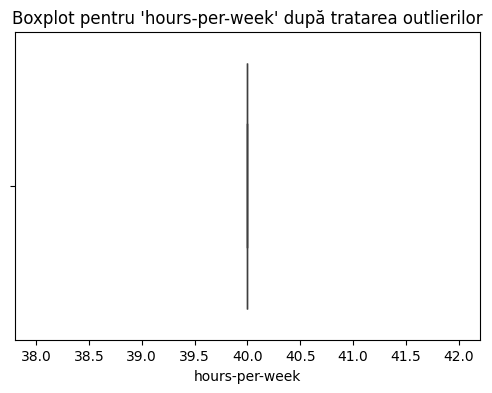

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["hours-per-week"])
plt.title("Boxplot pentru 'hours-per-week' dupƒÉ tratarea outlierilor")
plt.show()


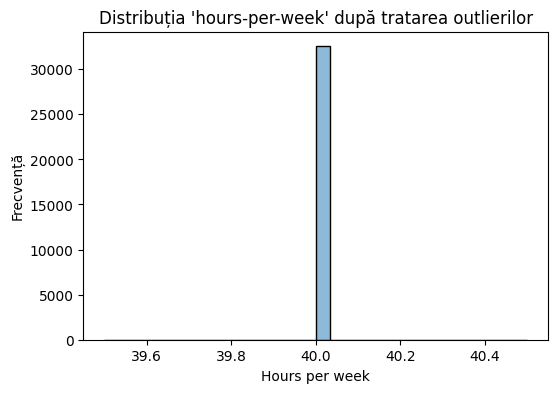

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df["hours-per-week"], bins=30, kde=True)
plt.title("Distribu»õia 'hours-per-week' dupƒÉ tratarea outlierilor")
plt.xlabel("Hours per week")
plt.ylabel("Frecven»õƒÉ")
plt.show()


In [47]:
print(df["hours-per-week"].describe())


count    32537.0
mean        40.0
std          0.0
min         40.0
25%         40.0
50%         40.0
75%         40.0
max         40.0
Name: hours-per-week, dtype: float64


In [48]:
print(df["hours-per-week"].describe())


count    32537.0
mean        40.0
std          0.0
min         40.0
25%         40.0
50%         40.0
75%         40.0
max         40.0
Name: hours-per-week, dtype: float64


In [50]:
import pandas as pd

# √éncarcƒÉ datasetul √Ænainte de tratarea outlierilor
df = pd.read_csv("census_data_preprocessed.csv")

print("‚úÖ Datele originale au fost restaurate fƒÉrƒÉ tratamentul outlierilor.")


‚úÖ Datele originale au fost restaurate fƒÉrƒÉ tratamentul outlierilor.


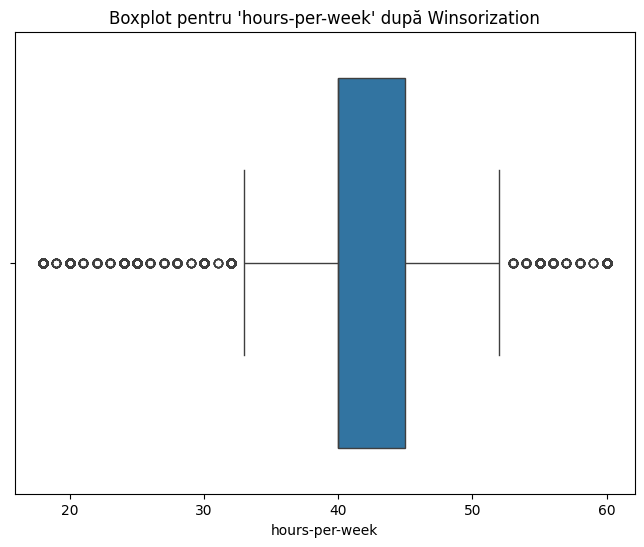

In [51]:
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

# AplicƒÉm Winsorizarea: limitƒÉm outlierii la 5% din extreme
df["hours-per-week"] = winsorize(df["hours-per-week"], limits=[0.05, 0.05])

# VerificƒÉm distribu»õia dupƒÉ Winsorizare
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["hours-per-week"])
plt.title("Boxplot pentru 'hours-per-week' dupƒÉ Winsorization")
plt.show()


In [52]:
# RecalculƒÉm limitele IQR dupƒÉ Winsorizare
Q1 = df["hours-per-week"].quantile(0.25)
Q3 = df["hours-per-week"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# NumƒÉrƒÉm c√¢»õi outlieri mai sunt
remaining_outliers = ((df["hours-per-week"] < lower_bound) | 
                      (df["hours-per-week"] > upper_bound)).sum()

print(f"üîç NumƒÉrul de outlieri rƒÉma»ôi √Æn 'hours-per-week': {remaining_outliers}")


üîç NumƒÉrul de outlieri rƒÉma»ôi √Æn 'hours-per-week': 9008


c:\Users\Madalina\OneDrive - Universitatea Babe≈ü-Bolyai\Machine learning\ML_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Madalina\OneDrive - Universitatea Babe≈ü-Bolyai\Machine learning\ML_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [53]:
df["hours-per-week"] = winsorize(df["hours-per-week"], limits=[0.10, 0.10])


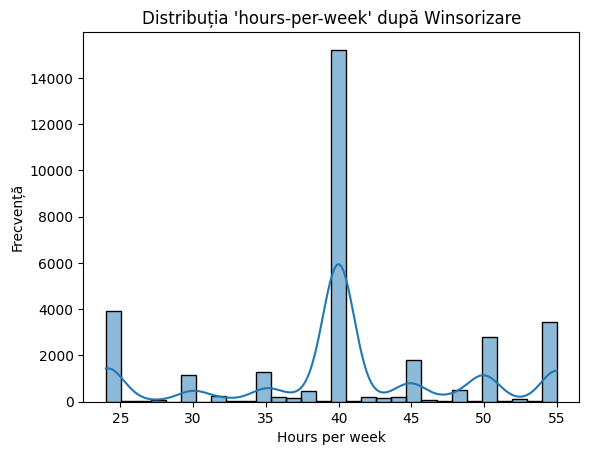

In [54]:
sns.histplot(df["hours-per-week"], bins=30, kde=True)
plt.title("Distribu»õia 'hours-per-week' dupƒÉ Winsorizare")
plt.xlabel("Hours per week")
plt.ylabel("Frecven»õƒÉ")
plt.show()


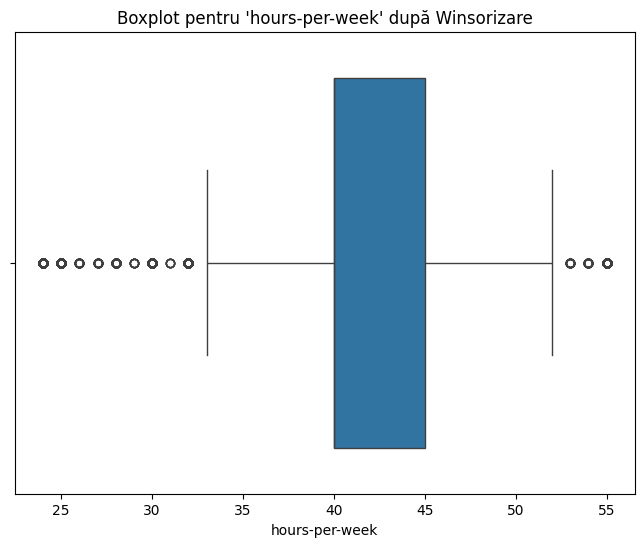

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["hours-per-week"])
plt.title("Boxplot pentru 'hours-per-week' dupƒÉ Winsorizare")
plt.show()


In [57]:
print(df["hours-per-week"].value_counts().sort_index())


hours-per-week
24     3269
25      674
26       30
27       30
28       86
29        7
30     1149
31        5
32      266
33       39
34       28
35     1297
36      220
37      149
38      476
39       38
40    15217
41       36
42      219
43      151
44      212
45     1824
46       82
47       49
48      517
49       29
50     2819
51       13
52      138
53       25
54       41
55     3426
Name: count, dtype: int64


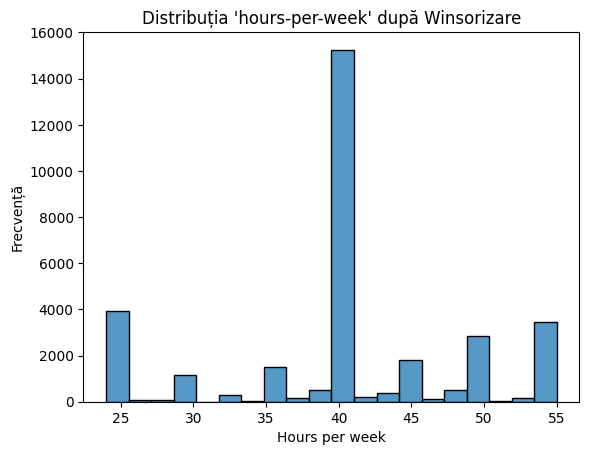

In [58]:
sns.histplot(df["hours-per-week"], bins=20)
plt.title("Distribu»õia 'hours-per-week' dupƒÉ Winsorizare")
plt.xlabel("Hours per week")
plt.ylabel("Frecven»õƒÉ")
plt.show()


In [59]:
sns.histplot(original_df["hours-per-week"], bins=30, color="red", alpha=0.5, label="Original")
sns.histplot(df["hours-per-week"], bins=30, color="blue", alpha=0.5, label="Winsorizat")
plt.legend()
plt.title("Comparatie: original vs. dupƒÉ Winsorizare")
plt.show()


NameError: name 'original_df' is not defined

In [60]:
import pandas as pd

original_df = pd.read_csv("census_data.csv")  # AsigurƒÉ-te cƒÉ acesta este fi»ôierul original


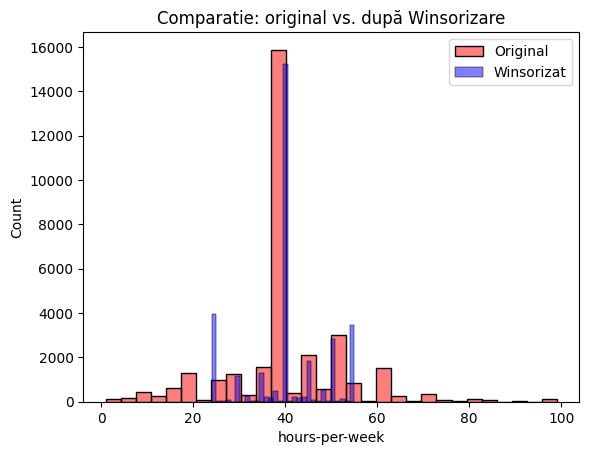

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(original_df["hours-per-week"], bins=30, color="red", alpha=0.5, label="Original")
sns.histplot(df["hours-per-week"], bins=30, color="blue", alpha=0.5, label="Winsorizat")
plt.legend()
plt.title("Comparatie: original vs. dupƒÉ Winsorizare")
plt.show()


In [62]:
import pandas as pd
import numpy as np

# SelectƒÉm doar coloanele numerice
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# CalculƒÉm limitele IQR pentru fiecare coloanƒÉ
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# NumƒÉrƒÉm outlierii pentru fiecare coloanƒÉ
outliers_count = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print("NumƒÉrul de outlieri per coloanƒÉ:\n", outliers_count)


NumƒÉrul de outlieri per coloanƒÉ:
 age                                143
fnlwgt                             992
education                         1198
education-num                     1198
sex                                  0
                                  ... 
native-country_Thailand             18
native-country_Trinadad&Tobago      19
native-country_United-States      3391
native-country_Vietnam              67
native-country_Yugoslavia           16
Length: 87, dtype: int64


In [63]:
from scipy.stats.mstats import winsorize

# Lista variabilelor numerice pe care aplicƒÉm Winsorizarea
cols_to_winsorize = ["age", "fnlwgt", "education-num"]

# AplicƒÉm Winsorizarea la fiecare coloanƒÉ numericƒÉ
for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # WinsorizeazƒÉ extremele la 5%

print("‚úî Outlierii au fost trata»õi pentru toate variabilele numerice!")


‚úî Outlierii au fost trata»õi pentru toate variabilele numerice!


In [64]:
# RecalculƒÉm outlierii dupƒÉ Winsorizare
Q1 = df[cols_to_winsorize].quantile(0.25)
Q3 = df[cols_to_winsorize].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remaining_outliers = ((df[cols_to_winsorize] < lower_bound) | (df[cols_to_winsorize] > upper_bound)).sum()
print("üîç NumƒÉrul de outlieri rƒÉma»ôi dupƒÉ Winsorizare:\n", remaining_outliers)


üîç NumƒÉrul de outlieri rƒÉma»ôi dupƒÉ Winsorizare:
 age              0
fnlwgt           0
education-num    0
dtype: int64


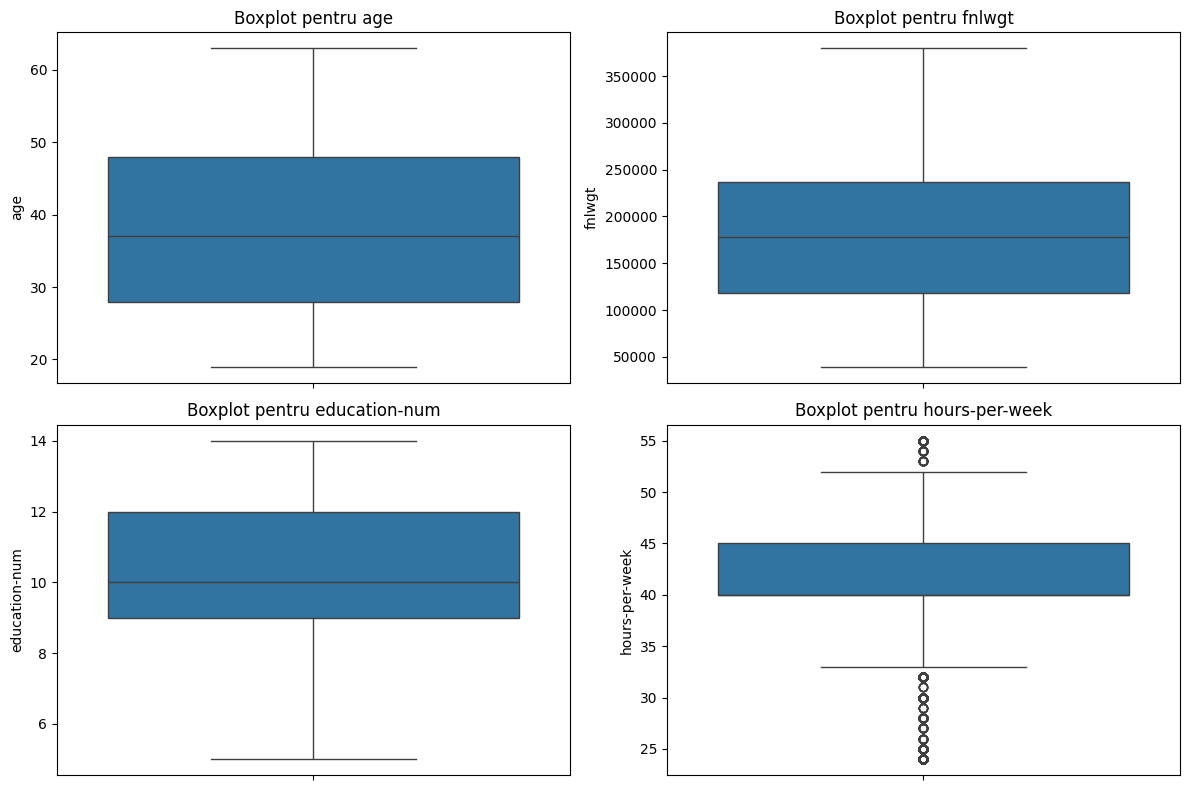

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variabilele la care am aplicat Winsorizare
cols_winsorized = ["age", "fnlwgt", "education-num", "hours-per-week"]  # AdaugƒÉ »ôi alte coloane dacƒÉ este cazul

# SetƒÉm dimensiunea figurii
plt.figure(figsize=(12, 8))

# CreƒÉm boxplot pentru fiecare coloanƒÉ
for i, col in enumerate(cols_winsorized, 1):
    plt.subplot(2, 2, i)  # 2 r√¢nduri, 2 coloane (ajusteazƒÉ √Æn func»õie de nr. de variabile)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot pentru {col}")

plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# VerificƒÉm c√¢te persoane lucreazƒÉ sub 25h pe sƒÉptƒÉm√¢nƒÉ
low_hours_distribution = df[df["hours-per-week"] < 25]["hours-per-week"].value_counts().sort_index()
print("Distribu»õia valorilor sub 25h:\n", low_hours_distribution)

# VerificƒÉm c√¢te persoane lucreazƒÉ peste 55h pe sƒÉptƒÉm√¢nƒÉ
high_hours_distribution = df[df["hours-per-week"] > 55]["hours-per-week"].value_counts().sort_index()
print("\nDistribu»õia valorilor peste 55h:\n", high_hours_distribution)

# Afi»ôƒÉm c√¢te r√¢nduri sunt afectate
print("\nTotal persoane cu <25h:", df[df["hours-per-week"] < 25].shape[0])
print("Total persoane cu >55h:", df[df["hours-per-week"] > 55].shape[0])


Distribu»õia valorilor sub 25h:
 hours-per-week
24    3269
Name: count, dtype: int64

Distribu»õia valorilor peste 55h:
 Series([], Name: count, dtype: int64)

Total persoane cu <25h: 3269
Total persoane cu >55h: 0


#### NU voi elimina valorile sub 25h, pentru cƒÉ sunt multe persoane √Æn aceastƒÉ categorie »ôi sunt valori realiste. 
#### Winsorizarea a fost eficientƒÉ pentru valorile mari (peste 55h), deoarece acum nu mai avem valori extreme.

#### Decidem daca folosim standardizare sau normalizare in analiza noastra de date

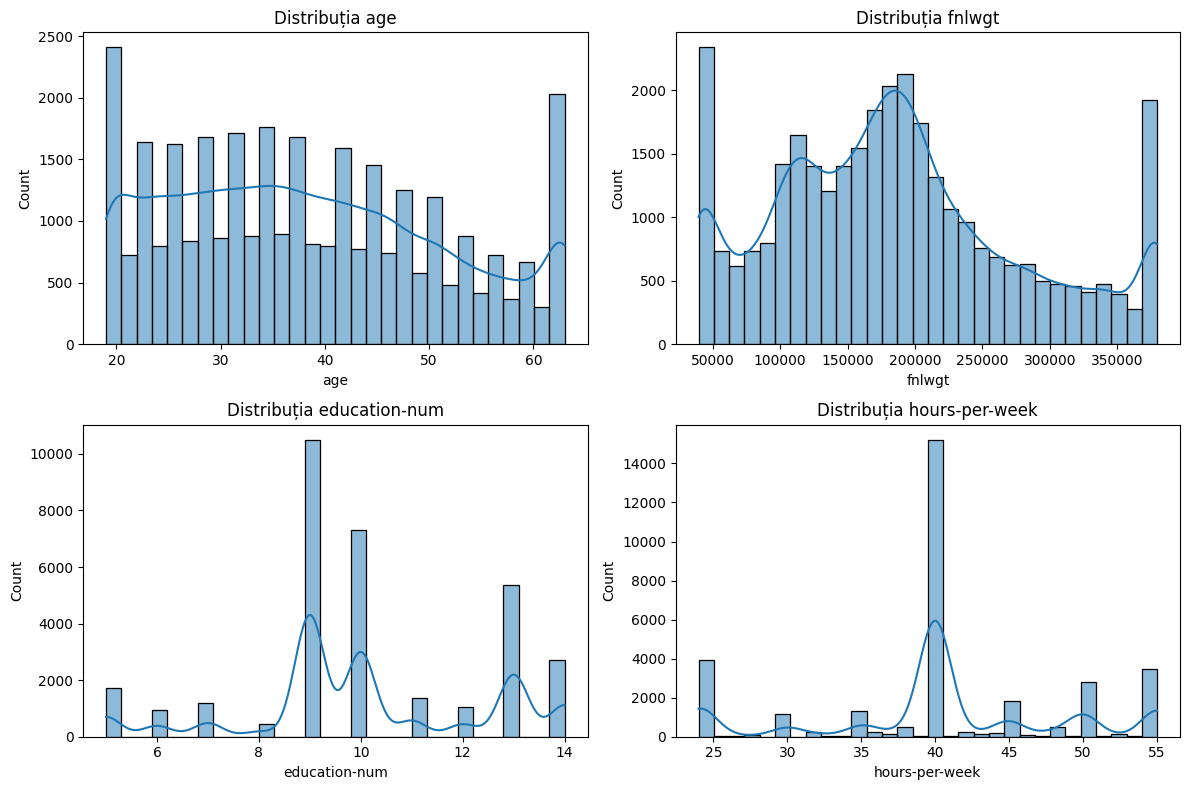

Testul Shapiro-Wilk pentru age: statisticƒÉ=0.9550374947804735, p-valoare=1.6129507561220178e-69
‚ö†Ô∏è age NU este distribuitƒÉ normal (se recomandƒÉ normalizare)
Testul Shapiro-Wilk pentru fnlwgt: statisticƒÉ=0.9608369142738249, p-valoare=1.223615215281033e-66
‚ö†Ô∏è fnlwgt NU este distribuitƒÉ normal (se recomandƒÉ normalizare)
Testul Shapiro-Wilk pentru education-num: statisticƒÉ=0.9112219451629311, p-valoare=1.278653011968006e-84
‚ö†Ô∏è education-num NU este distribuitƒÉ normal (se recomandƒÉ normalizare)
Testul Shapiro-Wilk pentru hours-per-week: statisticƒÉ=0.8860973597682731, p-valoare=1.567961272224066e-90
‚ö†Ô∏è hours-per-week NU este distribuitƒÉ normal (se recomandƒÉ normalizare)


c:\Users\Madalina\OneDrive - Universitatea Babe≈ü-Bolyai\Machine learning\ML_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32561.
  res = hypotest_fun_out(*samples, **kwds)


In [68]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histograma pentru variabilele numerice
num_cols = ["age", "fnlwgt", "education-num", "hours-per-week"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribu»õia {col}")

plt.tight_layout()
plt.show()

# Test de normalitate - Shapiro-Wilk
for col in num_cols:
    stat, p_value = stats.shapiro(df[col])
    print(f"Testul Shapiro-Wilk pentru {col}: statisticƒÉ={stat}, p-valoare={p_value}")

    if p_value > 0.05:
        print(f"‚úÖ {col} pare sƒÉ fie distribuitƒÉ normal (nu trebuie normalizare)")
    else:
        print(f"‚ö†Ô∏è {col} NU este distribuitƒÉ normal (se recomandƒÉ normalizare)")


#### Nu am aplicat normalizarea deoarece nu era necesarƒÉ pentru analiza noastrƒÉ. De»ôi variabilele nu urmeazƒÉ o distribu»õie normalƒÉ, regresia liniarƒÉ poate gestiona acest aspect. Am tratat outlierii prin Winsorizare, iar pƒÉstrarea valorilor originale asigurƒÉ o interpretare mai clarƒÉ a coeficien»õilor.


### Future engineering

#### 1. Categorii bazate pe orele lucrate

In [69]:
df["work_hours_category"] = df["hours-per-week"].apply(lambda x: "part-time" if x < 40 else "full-time")


##### Prin intermediul acestui cod am impartit angajatii in 2 categorii de munca in functie de nr de ore lucrate. Am denumit variabila work_hours_vategory astfel: "part-time" daca hours-per-week <40 si "full-time" daca hours-per-week >=40

#### 2. Nivelul de experien»õƒÉ estimat

In [70]:
df["experience_level"] = df["education-num"].apply(lambda x: "entry" if x <= 9 else ("mid" if x <= 13 else "senior"))


#### Am denumit variabila experience_level bazata pe o clasificare estimata a experientei astfel: "entry" pentru education-num <=9, "mid" -intre 10 si 13 si "senior" pentru education-num >13.

#### 3. Transformarea fnlwgt pentru distribu»õie normalƒÉ

In [71]:
import numpy as np
df["fnlwgt_log"] = np.log1p(df["fnlwgt"])


##### AceastƒÉ variabilƒÉ fnlwgt_log este folositƒÉ pentru a ajusta distribu»õia greutƒÉ»õii finale a e»ôantionului.  Variabila aplicƒÉ log-transform pentru a reduce skewness-ul √Æn fnlwgt.

#### 4. Binare pentru venit ridicat

In [72]:
df["high_income"] = df["income"].apply(lambda x: 1 if x == 1 else 0)


##### TransformƒÉm variabila income √Æntr-o variabilƒÉ binarƒÉ mai u»ôor de interpretat. Denumim variabila high_income ‚Äì O valoare binarƒÉ care indicƒÉ dacƒÉ o persoanƒÉ are venit ridicat: 1 dacƒÉ income == ">50K" 0 dacƒÉ income == "<=50K"

#### 5. Crearea unei variabile combinate √Æntre educa»õie »ôi ocupa»õie

In [75]:
df["edu_occ"] = df["education-num"].astype(str) + "_" + df["occupation"].astype(str)


KeyError: 'occupation'

In [74]:
occupation_cols = [col for col in df.columns if "occupation_" in col]
df["edu_occ"] = df["education-num"].astype(str) + "_" + df[occupation_cols].idxmax(axis=1).str.replace("occupation_", "")


In [76]:
occupation_cols = [col for col in df.columns if "occupation_" in col]
print("Coloanele pentru ocupa»õie:", occupation_cols)


Coloanele pentru ocupa»õie: ['occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']


In [77]:
df["edu_occ"] = df["education-num"].astype(str) + "_" + df[occupation_cols].idxmax(axis=1).str.replace("occupation_", "")


In [78]:
print(df[["education-num", "edu_occ"]].head(10))


   education-num              edu_occ
0             13      13_Adm-clerical
1             13   13_Exec-managerial
2              9  9_Handlers-cleaners
3              7  7_Handlers-cleaners
4             13    13_Prof-specialty
5             14   14_Exec-managerial
6              5      5_Other-service
7              9    9_Exec-managerial
8             14    14_Prof-specialty
9             13   13_Exec-managerial


In [79]:
print("NumƒÉr de categorii unice √Æn edu_occ:", df["edu_occ"].nunique())
print("Primele 10 categorii unice:\n", df["edu_occ"].unique()[:10])


NumƒÉr de categorii unice √Æn edu_occ: 135
Primele 10 categorii unice:
 ['13_Adm-clerical' '13_Exec-managerial' '9_Handlers-cleaners'
 '7_Handlers-cleaners' '13_Prof-specialty' '14_Exec-managerial'
 '5_Other-service' '9_Exec-managerial' '14_Prof-specialty'
 '10_Exec-managerial']


In [81]:
def categorize_education(num):
    if num <= 8:
        return "Low"
    elif 9 <= num <= 12:
        return "Medium"
    else:
        return "High"

df["education_level"] = df["education-num"].apply(categorize_education)

# VerificƒÉm distribu»õia noilor categorii
print(df["education_level"].value_counts())


education_level
Medium    20241
High       8067
Low        4253
Name: count, dtype: int64


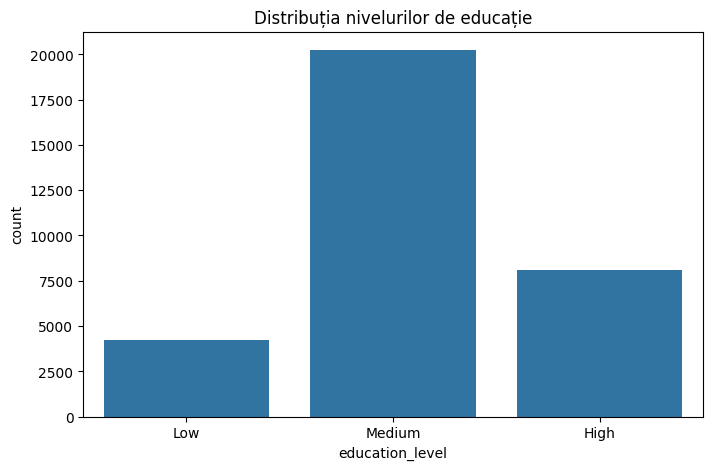

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=df["education_level"], order=["Low", "Medium", "High"])
plt.title("Distribu»õia nivelurilor de educa»õie")
plt.show()


In [83]:
df["edu_occ"] = df["education_level"] + "_" + df[occupation_cols].idxmax(axis=1).str.replace("occupation_", "")

# VerificƒÉm primele valori
print(df[["education_level", "edu_occ"]].head(10))


  education_level                   edu_occ
0            High         High_Adm-clerical
1            High      High_Exec-managerial
2          Medium  Medium_Handlers-cleaners
3             Low     Low_Handlers-cleaners
4            High       High_Prof-specialty
5            High      High_Exec-managerial
6             Low         Low_Other-service
7          Medium    Medium_Exec-managerial
8            High       High_Prof-specialty
9            High      High_Exec-managerial


In [92]:
df.head(20)

age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0    39   77516         13             13    1          2174             0   
1    50   83311         13             13    1             0             0   
2    38  215646          9              9    1             0             0   
3    53  234721          7              7    1             0             0   
4    28  338409         13             13    0             0             0   
5    37  284582         15             14    0             0             0   
6    49  160187          5              5    0             0             0   
7    52  209642          9              9    1             0             0   
8    31   45781         15             14    0         14084             0   
9    42  159449         13             13    1          5178             0   
10   37  280464         10             10    1             0             0   
11   30  141297         13             13    1             0             0   
12   23  122272         13             13    0             0             0   
13   32  205019         12             12    1             0             0   
14   40  121772         11             11    1             0             0   
15   34  245487          4              5    1             0             0   
16   25  176756          9              9    1             0             0   
17   32  186824          9              9    1             0             0   
18   38   39460          7              7    1             0             0   
19   43  292175         15             14    0             0             0   

    hours-per-week  income  workclass_Federal-gov  ...  \
0               40       0                      0  ...   
1               24       0                      0  ...   
2               40       0                      0  ...   
3               40       0                      0  ...   
4               40       0                      0  ...   
5               40       0                      0  ...   
6               24       0                      0  ...   
7               45       1                      0  ...   
8               50       1                      0  ...   
9               40       1                      0  ...   
10              55       1                      0  ...   
11              40       1                      0  ...   
12              30       0                      0  ...   
13              50       0                      0  ...   
14              40       1                      0  ...   
15              45       0                      0  ...   
16              35       0                      0  ...   
17              40       0                      0  ...   
18              50       0                      0  ...   
19              45       1                      0  ...   

    native-country_Trinadad&Tobago  native-country_United-States  \
0                                0                             1   
1                                0                             1   
2                                0                             1   
3                                0                             1   
4                                0                             0   
5                                0                             1   
6                                0                             0   
7                                0                             1   
8                                0                             1   
9                                0                             1   
10                               0                             1   
11                               0                             0   
12                               0                             1   
13                               0                             1   
14                               0                             0   
15                               0                        